#### Notebook to address the following two points raised by Hannah:

> 1. I think it would be helpful to look at what symptoms only happen on their own (or maybe with like less than 5 others). I would guess that’s true for a % of smell and taste loss 
> 2. also, it would be interesting to see what the 3% of people without fatigue do have!

#### Main takeways:

- Only Symptom_Memory_short ever occurs on its own.
- (I think) There are no symptoms which exclusively occur in a small group. But there are symptoms which tend to co-occur with a smaller number of symptoms, and those which tend to co-occur with larger number of symptoms - see 2x co-occurence distribution plots near end of notebook which illustrate the two extremes.
- Loss of smell and taste are both on the top 30 symtpoms with the lowest minimum number of co-occurent symptoms (see dataframe head below). On average they co-occur with ~49 others symptoms, which is well below the mean of 58.6 (see first plot).
- Patients without fatigue are 3% of the dataset - see dataframe of the end of the notebook for the 20 most and least common symptoms these patients have.

This analysis can be extended if interesting...(I will in any case be creating a co-occurence network of symptoms, which will be the inverse of my patient network, and can be used to produce or evaluate symptom groupings.)

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/cleaned_data_SYMPTOMS_9_7_23.csv', index_col=0)
df = df.fillna(value=0)

In [4]:
row_sum = df.sum(axis=1)

In [5]:
shared = pd.DataFrame()

In [123]:
# Convert the zeros to nan, because we want zeros to indicate no shared symptoms. Whereas nan indicates symptom itself is not present for that patient.
df_nan = df[df == 0] = np.nan

In [89]:
shared = df.to_numpy()

In [90]:
for i in range(shared.shape[1]):
    shared[:, i] *= row_sum - 1

In [91]:
shared = pd.DataFrame(shared, columns=df.columns)

In [93]:
shared = shared.transpose()

In [94]:
shared_summary = pd.DataFrame(index = shared.index)

In [113]:
shared_summary['mean'] = np.nanmean(shared, axis=1)
shared_summary['median'] = np.nanmedian(shared, axis=1)
shared_summary['min'] = np.nanmin(shared, axis=1)
shared_summary['max'] = np.nanmax(shared, axis=1)
shared_summary['std'] = np.nanstd(shared, axis=1)

In [141]:
shared_summary.sort_values(by='min', ascending=True).head(30)

,mean,median,min,max,std
Symptom_Memory_short,44.947114,42.0,0.0,157.0,22.529043
Symptom_Sensations_skin_burning_no_rash,56.139855,54.0,1.0,157.0,22.510867
Symptom_SkinAllergy_other_itchy,59.343931,54.0,1.0,157.0,26.446591
Symptom_Fatigue,44.998816,42.0,1.0,157.0,22.048673
Symptom_Altered_smell,55.200292,53.0,2.0,157.0,25.650957
Symptom_Joint_pain,53.395638,51.0,2.0,157.0,22.198488
Symptom_Sleep_other,51.850423,49.0,2.0,157.0,22.123216
Symptom_Dry_cough,48.525918,45.0,2.0,157.0,22.311473
Symptom_Vivid_dreams,56.226240,54.0,2.0,157.0,22.756650
Symptom_Tightness_of_chest,49.543727,47.0,3.0,157.0,22.169892


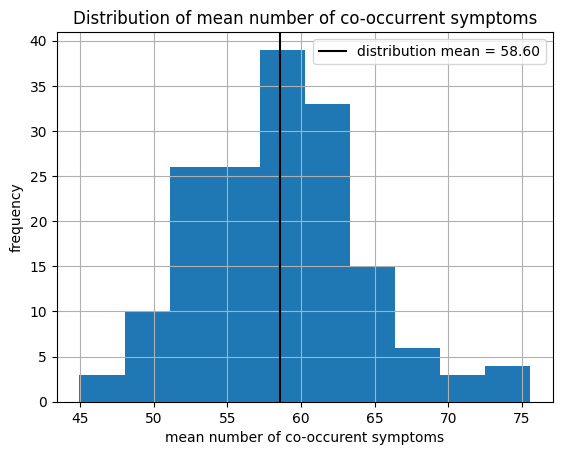

In [160]:
shared_summary['mean'].hist();
plt.axvline(shared_summary['mean'].mean(), color='k', label='distribution mean = %.2f' % shared_summary['mean'].mean());
plt.legend()
plt.title('Distribution of mean number of co-occurrent symptoms');
plt.xlabel('mean number of co-occurent symptoms')
plt.ylabel('frequency');

##### Symptom_Memory_short is the only one that appears without any other symptoms. This happens for 5 patients:

In [138]:
(shared==0).sum().sort_values(ascending=False)

Symptom_Memory_short                          5
Symptom_Hearing_loss                          0
Symptom_Eye_vision_symptoms                   0
Symptom_Reproductive_all_menstrual_issues     0
Symptom_Bladder_control                       0
                                             ..
Symptom_Hallucinations_tactile                0
Symptom_Hallucinations_other                  0
Symptom_Sensations_skin_burning_no_rash       0
Symptom_Sensations_numbness_loss_sensation    0
Symptom_Change_sensitivity_to_meds            0
Length: 165, dtype: int64

##### Four symptoms occur just with one other: 

In [140]:
(shared==1).sum().sort_values(ascending=False)

Symptom_Memory_short                          5
Symptom_Fatigue                               2
Symptom_Sensations_skin_burning_no_rash       2
Symptom_SkinAllergy_other_itchy               1
Symptom_Dermatographia                        0
                                             ..
Symptom_Hallucinations_auditory               0
Symptom_Hallucinations_tactile                0
Symptom_Hallucinations_other                  0
Symptom_Sensations_numbness_loss_sensation    0
Symptom_Change_sensitivity_to_meds            0
Length: 165, dtype: int64

#### Most symptoms co-occur with a maximum of 157 other symptoms. However, this is just one patient with 157 symptoms: 

In [144]:
(shared==157).sum().sort_values(ascending=False).head(15)

Symptom_Memory_short                         1
Symptom_Derealization                        1
Symptom_Tinnitus                             1
Symptom_Eye_vision_symptoms                  1
Symptom_Reproductive_all_menstrual_issues    1
Symptom_Bladder_control                      1
Symptom_Peeling_skin                         1
Symptom_Petechiae                            1
Symptom_Covid_toes                           1
Symptom_Dermatographia                       1
Symptom_New_allergies                        1
Symptom_Skin_rashes                          1
Symptom_Muscle_spasms                        1
Symptom_Muscle_aches                         1
Symptom_Joint_pain                           1
dtype: int64

In [119]:
shared = shared.transpose()

##### Here we plot the co-occurence distributiuons for the symptoms with the lowest and highest mean co-occurence count respectively:

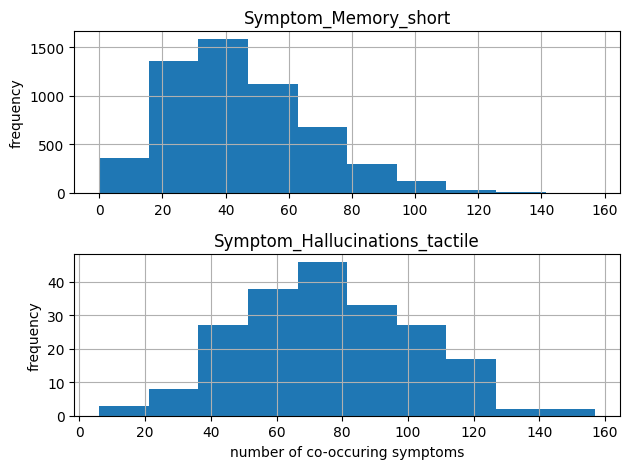

In [122]:
plt.subplot(2,1,1)
shared['Symptom_Memory_short'].hist()
plt.ylabel('frequency')
# plt.xlabel('number of co-occuring symptoms')
plt.title('Symptom_Memory_short');
plt.subplot(2,1,2)
shared['Symptom_Hallucinations_tactile'].hist()
plt.ylabel('frequency')
plt.xlabel('number of co-occuring symptoms')
plt.title('Symptom_Hallucinations_tactile');
plt.tight_layout()

#### TODO: Convert these to row-wise symtom sharing (i.e. extract lists of shared features)

In [64]:
df.to_numpy().nonzero()

(array([   0,    0,    0, ..., 6034, 6034, 6034]),
 array([  0,   5,   7, ..., 132, 162, 163]))

### Finally, what symptoms do the 3% of people without fatigue have?

In [179]:
no_fatigue = df[df.Symptom_Fatigue.isna()]

In [180]:
no_fatigue = no_fatigue.sum().sort_values(ascending=False)

In [181]:
no_fatigue = pd.DataFrame(no_fatigue, columns=['count'])

In [187]:
no_fatigue['frequency'] = no_fatigue['count'] / df.Symptom_Fatigue.isna().sum()

In [203]:
main_count = pd.DataFrame(df.sum(), columns=['count (whole dataset)'])
no_fatigue = no_fatigue.join(other=main_count)
no_fatigue['frequency (whole dataset)'] = no_fatigue['count (whole dataset)'] / len(df)

In [204]:
no_fatigue.head(20)

,count,frequency,count (whole dataset),frequency (whole dataset)
Symptom_Memory_short,120.0,0.967742,5578.0,0.924275
Symptom_PEM,55.0,0.443548,5333.0,0.883679
Symptom_Tightness_of_chest,50.0,0.403226,4105.0,0.680199
Symptom_Heart_palpitations,49.0,0.395161,3961.0,0.656338
Symptom_Shortness_of_breath,49.0,0.395161,4447.0,0.736868
Symptom_Insomnia,45.0,0.362903,4183.0,0.693123
Symptom_Diarrhea,44.0,0.354839,3326.0,0.551118
Symptom_Tachycardia,42.0,0.338710,3573.0,0.592046
Symptom_Dry_cough,41.0,0.330645,3839.0,0.636123
Symptom_Pain_burning_chest,40.0,0.322581,2854.0,0.472908


In [205]:
no_fatigue.tail(20)

,count,frequency,count (whole dataset),frequency (whole dataset)
Symptom_Restless_leg,4.0,0.032258,1145.0,0.189727
Symptom_Reproductive_abnormally_heavy_periods_clotting,4.0,0.032258,576.0,0.095443
Symptom_Slurring_words,4.0,0.032258,1007.0,0.166860
Symptom_Dermatographia,4.0,0.032258,485.0,0.080365
Symptom_New_anaphylaxis,3.0,0.024194,259.0,0.042916
Symptom_Speech_changes_to_secondary_languages,3.0,0.024194,336.0,0.055675
Symptom_Speech_other,3.0,0.024194,260.0,0.043082
Symptom_SkinAllergy_shingles,3.0,0.024194,155.0,0.025684
Symptom_Sensations_facial_pressure_right,3.0,0.024194,410.0,0.067937
Symptom_SkinAllergy_other_itchy,3.0,0.024194,346.0,0.057332
